# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 데이터 분석

In [3]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)

train data shape:  (891, 12)
test data shape:  (418, 11)


In [4]:
print('---[train information]---')
print(train.info())

---[train information]---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print('---[test information]---')
print(test.info())

---[test information]---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 2-1 Pie chart for Categorical feature

In [9]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

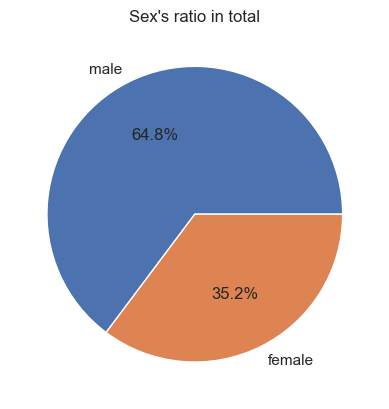

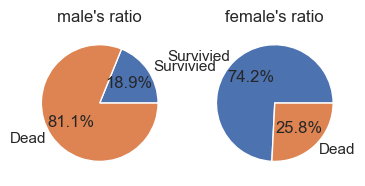

In [10]:
pie_chart('Sex')

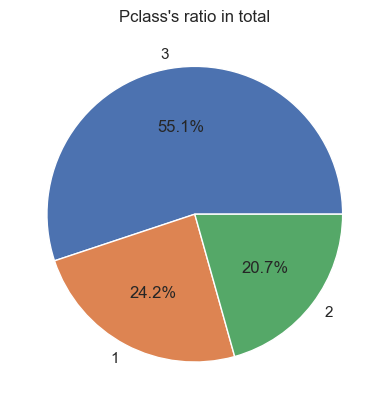

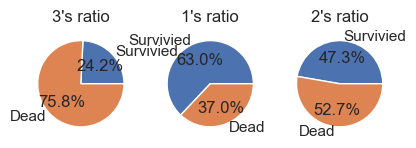

In [11]:
pie_chart('Pclass')

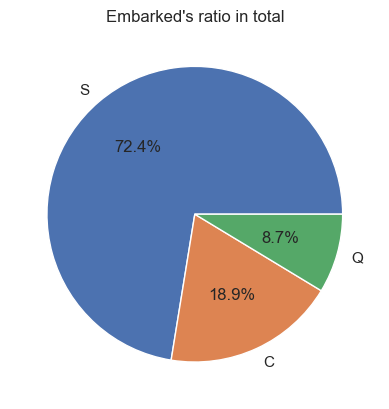

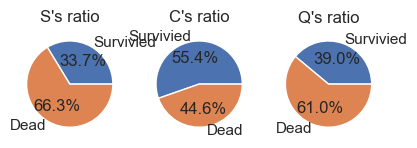

In [12]:
pie_chart('Embarked')

## 2-2. Bar chart for Categorical feature

In [13]:
def bar_chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

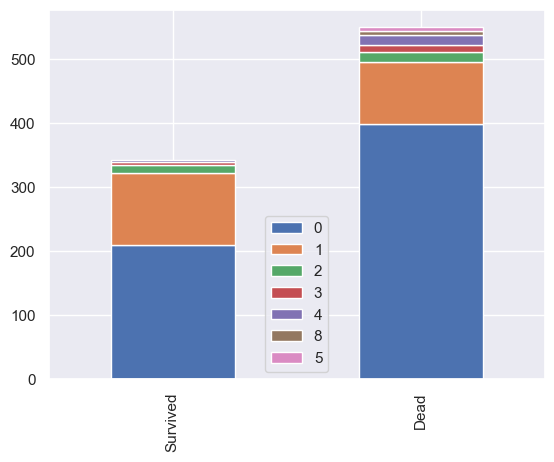

In [14]:
bar_chart(train, 'SibSp')

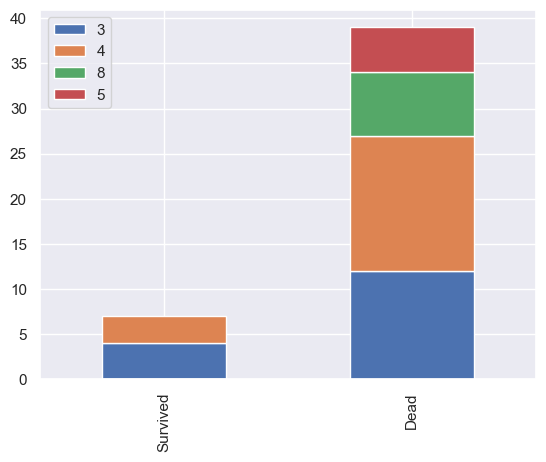

In [15]:
temp = train[(train['SibSp'] > 2)]
bar_chart(temp, 'SibSp')

<AxesSubplot:>

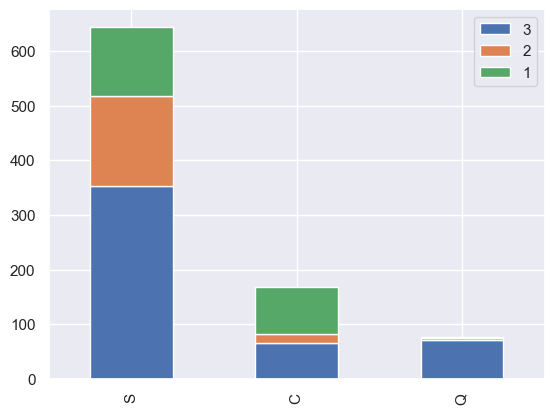

In [16]:
S = train[train['Embarked'] == 'S']['Pclass'].value_counts()
C = train[train['Embarked'] == 'C']['Pclass'].value_counts()
Q = train[train['Embarked'] == 'Q']['Pclass'].value_counts()
df = pd.DataFrame([S, C, Q])
df.index = ['S', 'C', 'Q']
df.plot(kind='bar', stacked=True)

# 3. 데이터 전처리 및 특성 추출

In [17]:
train_and_test = [train, test]

## 3-1. Name Feature

In [18]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [21]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

## 3-2. Sex Feature

In [22]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

## 3-3. Embarked Feature

In [23]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [24]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype('str')

## 3-4. Age Feature

In [25]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(),inplace = True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Survived']].groupby(['AgeBand'],as_index = False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [26]:
for dataset in train_and_test:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age'] = 2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age'] = 3
    dataset.loc[dataset['Age']>64,'Age'] = 4
    dataset['Age'] = dataset['Age'].map({0:'Child', 1:'Young', 2:'Middle', 3:'Prime', 4:'Old'}).astype(str)

## 3-5. SibSp & Parch Feature (Family)

In [27]:
for dataset in train_and_test:
    dataset['Family'] = dataset["Parch"] + dataset["SibSp"]
    dataset["Family"] = dataset["Family"].astype(int)

## 3-7. 특성 추출 및 나머지 전처리

In [28]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age Embarked Title  Family
0         0       3    male   Young        S    Mr       1
1         1       1  female  Middle        C   Mrs       1
2         1       3  female   Young        S  Miss       0
3         1       1  female  Middle        S   Mrs       1
4         0       3    male  Middle        S    Mr       0
   PassengerId  Pclass     Sex     Age Embarked Title  Family
0          892       3    male  Middle        Q    Mr       0
1          893       3  female  Middle        S   Mrs       1
2          894       2    male   Prime        Q    Mr       0
3          895       3    male   Young        S    Mr       0
4          896       3  female   Young        S   Mrs       2


In [29]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family
0,0,3,male,Young,S,Mr,1
1,1,1,female,Middle,C,Mrs,1
2,1,3,female,Young,S,Miss,0
3,1,1,female,Middle,S,Mrs,1
4,0,3,male,Middle,S,Mr,0


In [30]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [31]:
train.head()

,Survived,Pclass,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,0,3,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [32]:
test.head()

,PassengerId,Pclass,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,893,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,894,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,895,3,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,896,3,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [33]:
train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

# 4. 모델 설계 및 학습

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [35]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [36]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [42]:
log_pred = train_and_test(LogisticRegression())
svm_pred = train_and_test(SVC())
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
nb_pred = train_and_test(GaussianNB())

Accuracy :  83.05 %
Accuracy :  83.5 %
Accuracy :  84.06 %
Accuracy :  86.2 %
Accuracy :  79.8 %


/Users/bagnahui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/bagnahui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

In [38]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)